In [336]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import statsmodels.api as sm

In [337]:
food_waste = pd.read_csv("01_FOOD_WASTE.csv", encoding='cp949')
resident_pop = pd.read_csv("03_RESIDENT_POP.csv", encoding='cp949')
card_spending = pd.read_csv("04_CARD_SPENDING.csv", encoding='cp949')

c:\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [338]:
pd.set_option('display.max_row', 500)
pd.set_option('display.max_columns', 100)

In [339]:
food_waste

,base_date,city,emd_cd,emd_nm,em_area_cd,em_cnt,em_g,pay_amt
0,2018-01-01,제주시,50110670,외도동,W6X062,2,15500,464
1,2018-01-01,제주시,50110540,이도2동,W6X063,26,64650,1933
2,2018-01-01,제주시,50110630,아라동,W6X064,15,33500,1001
3,2018-01-01,제주시,50110610,삼양동,W6X065,4,8400,252
4,2018-01-01,제주시,50110540,이도2동,W6X066,21,51450,1538
...,...,...,...,...,...,...,...,...
2209856,2020-12-14,서귀포시,50130250,대정읍,W6Y722,16,26950,805
2209857,2020-12-14,서귀포시,50130250,대정읍,W6Y72A,3,17000,510
2209858,2020-12-14,서귀포시,50130310,안덕면,W6Y72B,5,5650,168
2209859,2020-12-14,서귀포시,50130310,안덕면,W6Y72C,11,20700,619


In [340]:
food_waste['base_date'] = pd.to_datetime(food_waste['base_date'])

In [341]:
food_waste['year'] = food_waste['base_date'].dt.year

In [342]:
food_waste['month'] = food_waste['base_date'].dt.month

In [343]:
foodwaste = food_waste.groupby(['year','month', 'emd_nm'])['em_g'].sum().reset_index()

In [344]:
foodwaste

,year,month,emd_nm,em_g
0,2018,1,건입동,45646550
1,2018,1,남원읍,42437700
2,2018,1,노형동,265018400
3,2018,1,대륜동,57612600
4,2018,1,대정읍,38885550
...,...,...,...,...
1661,2021,6,표선면,41102950
1662,2021,6,한경면,27060150
1663,2021,6,한림읍,82746990
1664,2021,6,화북동,110750050


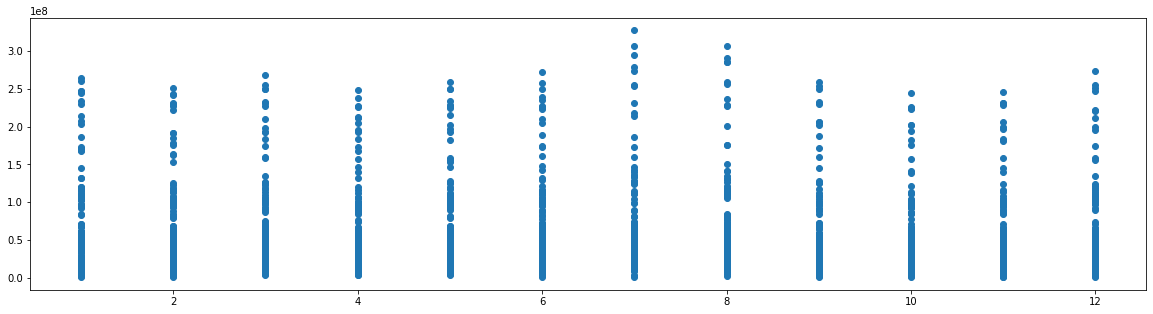

In [345]:
plt.figure(figsize=(20,5))
plt.scatter(x = 'month', y = 'em_g', data = foodwaste)

c:\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44148 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51077 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45224 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50896 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51021 missing from current font.
  font.set_text(s, 0.0,

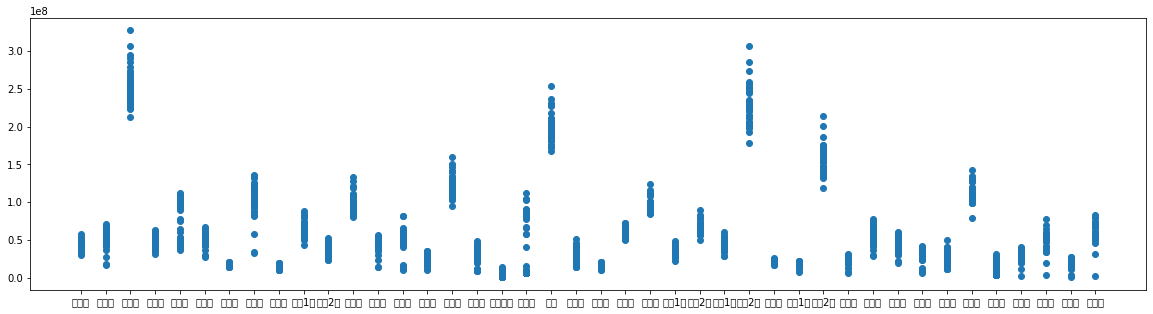

In [346]:
plt.figure(figsize=(20,5))
plt.scatter(x = 'emd_nm', y = 'em_g', data = foodwaste)

<AxesSubplot:ylabel='Frequency'>

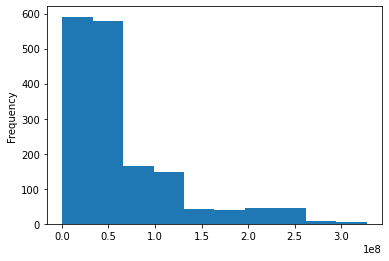

In [347]:
foodwaste['em_g'].plot.hist()

In [348]:
foodwaste['em_g'] = np.log(foodwaste[['em_g']])

<AxesSubplot:ylabel='Frequency'>

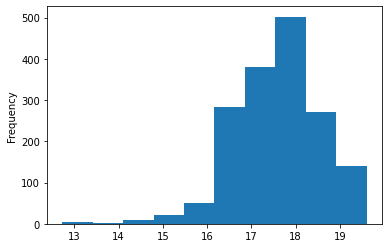

In [349]:
foodwaste['em_g'].plot.hist()

<AxesSubplot:ylabel='em_g'>

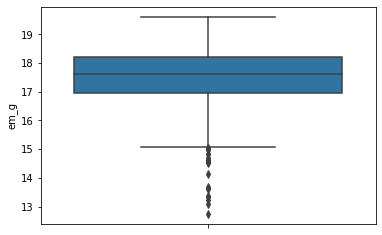

In [350]:
sns.boxplot(y='em_g',data=foodwaste)

In [351]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [352]:
foodwaste['em_g'] = scaler.fit_transform(foodwaste[['em_g']])

In [353]:
foodwaste

,year,month,emd_nm,em_g
0,2018,1,건입동,0.062786
1,2018,1,남원읍,-0.014238
2,2018,1,노형동,1.921404
3,2018,1,대륜동,0.308802
4,2018,1,대정읍,-0.106610
...,...,...,...,...
1661,2021,6,표선면,-0.048008
1662,2021,6,한경면,-0.489732
1663,2021,6,한림읍,0.691381
1664,2021,6,화북동,0.999399


In [354]:
resident_pop.head()

,base_year,base_month,city,emd_cd,emd_nm,sex,resid_reg_pop,foreign_pop,total_pop
0,2018,1,제주시,50110590,건입동,남성,5085,146,5231
1,2018,1,제주시,50110590,건입동,여성,4715,82,4797
2,2018,1,제주시,50110256,구좌읍,남성,7965,368,8333
3,2018,1,제주시,50110256,구좌읍,여성,7609,184,7793
4,2018,1,서귀포시,50130253,남원읍,남성,9806,428,10234


In [355]:
resident_pop.rename(columns = {resident_pop.columns[0]:"year", resident_pop.columns[1]:"month"}, inplace=True)

In [356]:
residentpop = resident_pop.groupby(['year','month', 'emd_nm', 'sex'])['resid_reg_pop','foreign_pop','total_pop'].sum().reset_index()

<ipython-input-356-ff75055fb85a>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  residentpop = resident_pop.groupby(['year','month', 'emd_nm', 'sex'])['resid_reg_pop','foreign_pop','total_pop'].sum().reset_index()


In [357]:
residentpop

,year,month,emd_nm,sex,resid_reg_pop,foreign_pop,total_pop
0,2018,1,건입동,남성,5085,146,5231
1,2018,1,건입동,여성,4715,82,4797
2,2018,1,구좌읍,남성,7965,368,8333
3,2018,1,구좌읍,여성,7609,184,7793
4,2018,1,남원읍,남성,9806,428,10234
...,...,...,...,...,...,...,...
3607,2021,6,한림읍,여성,10341,1140,11481
3608,2021,6,화북동,남성,12062,169,12231
3609,2021,6,화북동,여성,12238,161,12399
3610,2021,6,효돈동,남성,2660,39,2699


In [358]:
residentpop.loc[:,['resid_reg_pop', 'foreign_pop','total_pop']].corr()

,resid_reg_pop,foreign_pop,total_pop
resid_reg_pop,1.000000,0.546006,0.998927
foreign_pop,0.546006,1.000000,0.584216
total_pop,0.998927,0.584216,1.000000


In [359]:
residentpop = residentpop.drop(['total_pop'], axis=1)

In [360]:
residentpop

,year,month,emd_nm,sex,resid_reg_pop,foreign_pop
0,2018,1,건입동,남성,5085,146
1,2018,1,건입동,여성,4715,82
2,2018,1,구좌읍,남성,7965,368
3,2018,1,구좌읍,여성,7609,184
4,2018,1,남원읍,남성,9806,428
...,...,...,...,...,...,...
3607,2021,6,한림읍,여성,10341,1140
3608,2021,6,화북동,남성,12062,169
3609,2021,6,화북동,여성,12238,161
3610,2021,6,효돈동,남성,2660,39


In [361]:
residentpop = pd.get_dummies(residentpop, columns=['sex'])

In [362]:
residentpop['남성_resid_reg_pop'] = residentpop['sex_남성']*residentpop['resid_reg_pop']
residentpop['여성_resid_reg_pop'] = residentpop['sex_여성']*residentpop['resid_reg_pop']
residentpop['남성_foreign_pop'] = residentpop['sex_남성']*residentpop['foreign_pop']
residentpop['여성_foreign_pop'] = residentpop['sex_여성']*residentpop['foreign_pop']

In [363]:
residentpop = residentpop.groupby(['year','month','emd_nm'])['남성_resid_reg_pop','여성_resid_reg_pop','남성_foreign_pop','여성_foreign_pop'].sum().reset_index()

<ipython-input-363-33ae5d2e0c65>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  residentpop = residentpop.groupby(['year','month','emd_nm'])['남성_resid_reg_pop','여성_resid_reg_pop','남성_foreign_pop','여성_foreign_pop'].sum().reset_index()


In [364]:
residentpop

,year,month,emd_nm,남성_resid_reg_pop,여성_resid_reg_pop,남성_foreign_pop,여성_foreign_pop
0,2018,1,건입동,5085,4715,146,82
1,2018,1,구좌읍,7965,7609,368,184
2,2018,1,남원읍,9806,9306,428,200
3,2018,1,노형동,26286,27083,821,768
4,2018,1,대륜동,6836,6637,83,95
...,...,...,...,...,...,...,...
1801,2021,6,표선면,6314,6033,211,123
1802,2021,6,한경면,4627,4531,237,100
1803,2021,6,한림읍,10891,10341,2090,1140
1804,2021,6,화북동,12062,12238,169,161


c:\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45224 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 45224 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_text(s, 0, flags

<AxesSubplot:>

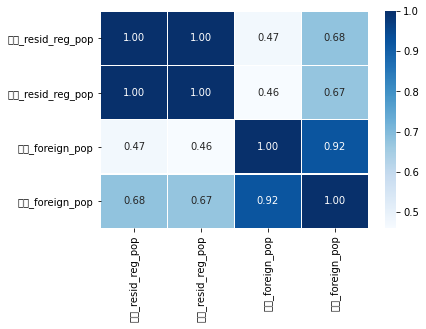

In [365]:
sns.heatmap(data=residentpop.drop(['year', 'month', 'emd_nm'], axis=1).corr(), cmap="Blues", annot=True, fmt='.2f', linewidths=.5)

In [366]:
residentpop['resid_reg_pop'] = residentpop['남성_resid_reg_pop'] + residentpop['여성_resid_reg_pop']
residentpop['foreign_pop'] = residentpop['남성_foreign_pop'] + residentpop['여성_foreign_pop']

In [367]:
residentpop = residentpop.loc[:,['year', 'month', 'emd_nm', 'resid_reg_pop', 'foreign_pop']]

In [368]:
residentpop

,year,month,emd_nm,resid_reg_pop,foreign_pop
0,2018,1,건입동,9800,228
1,2018,1,구좌읍,15574,552
2,2018,1,남원읍,19112,628
3,2018,1,노형동,53369,1589
4,2018,1,대륜동,13473,178
...,...,...,...,...,...
1801,2021,6,표선면,12347,334
1802,2021,6,한경면,9158,337
1803,2021,6,한림읍,21232,3230
1804,2021,6,화북동,24300,330


<AxesSubplot:ylabel='Frequency'>

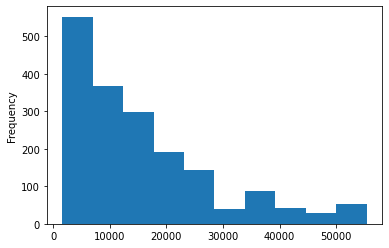

In [369]:
residentpop['resid_reg_pop'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

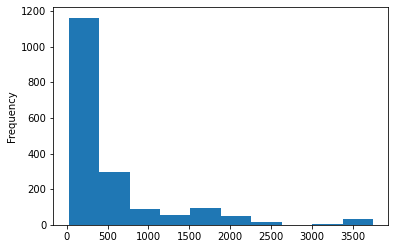

In [370]:
residentpop['foreign_pop'].plot.hist()

In [371]:
residentpop['resid_reg_pop'] = np.log(residentpop[['resid_reg_pop']])
residentpop['foreign_pop'] = np.log(residentpop[['foreign_pop']])

<AxesSubplot:ylabel='Frequency'>

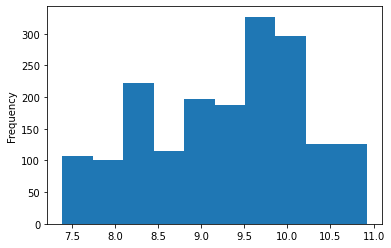

In [372]:
residentpop['resid_reg_pop'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

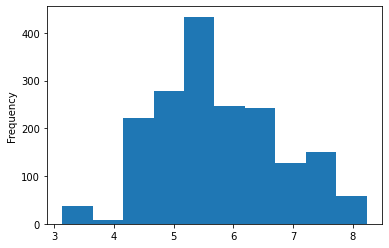

In [373]:
residentpop['foreign_pop'].plot.hist()

<AxesSubplot:ylabel='resid_reg_pop'>

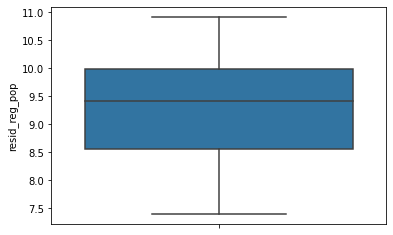

In [374]:
sns.boxplot(y='resid_reg_pop',data=residentpop)

<AxesSubplot:ylabel='foreign_pop'>

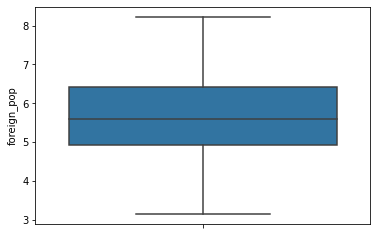

In [375]:
sns.boxplot(y='foreign_pop',data=residentpop)

In [376]:
residentpop['resid_reg_pop'] = scaler.fit_transform(residentpop[['resid_reg_pop']])
residentpop['foreign_pop'] = scaler.fit_transform(residentpop[['foreign_pop']])

In [377]:
residentpop

,year,month,emd_nm,resid_reg_pop,foreign_pop
0,2018,1,건입동,-0.108019,-0.310915
1,2018,1,구좌읍,0.403077,0.534475
2,2018,1,남원읍,0.628948,0.657805
3,2018,1,노형동,1.761997,1.545376
4,2018,1,대륜동,0.243184,-0.547610
...,...,...,...,...,...
1801,2021,6,표선면,0.146889,0.054121
1802,2021,6,한경면,-0.182776,0.062671
1803,2021,6,한림읍,0.745013,2.223614
1804,2021,6,화북동,0.893929,0.042602


In [378]:
card_spending.head(100)

,base_date,city,emd_cd,emd_nm,mct_cat_cd,mct_cat_nm,use_cnt,use_amt
0,2018-01-06,제주시,50110650,연동,C00100,한식,3643,127777300
1,2018-01-09,제주시,50110650,연동,C00500,패스트푸드,432,6711675
2,2018-01-15,제주시,50110650,연동,C01200,농축수산물,236,16089579
3,2018-01-15,제주시,50110650,연동,A00200,마트/슈퍼마켓,4031,121979867
4,2018-01-20,제주시,50110650,연동,C01000,식품,633,30410674
5,2018-01-22,제주시,50110650,연동,C00900,주점및주류판매,49,2212446
6,2018-01-22,제주시,50110650,연동,C00200,양식,98,2912705
7,2018-01-26,제주시,50110650,연동,C00200,양식,182,7191382
8,2018-01-30,제주시,50110650,연동,C01000,식품,481,18497443
9,2018-01-31,제주시,50110650,연동,C00500,패스트푸드,555,8944547


In [379]:
card_spending['base_date'] = pd.to_datetime(card_spending['base_date'])

In [380]:
card_spending['year'] = card_spending['base_date'].dt.year

In [381]:
card_spending['month'] = card_spending['base_date'].dt.month

In [382]:
cardspending = card_spending.groupby(['year','month', 'emd_nm', 'mct_cat_nm']).sum().reset_index()

In [383]:
cardspending

,year,month,emd_nm,mct_cat_nm,use_cnt,use_amt
0,2018,1,건입동,간식,4540,52714107
1,2018,1,건입동,농축수산물,1699,180535251
2,2018,1,건입동,마트/슈퍼마켓,17547,613458055
3,2018,1,건입동,배달,585,11571838
4,2018,1,건입동,부페,55,5081850
...,...,...,...,...,...,...
20000,2021,6,효돈동,아시아음식,720,25716378
20001,2021,6,효돈동,양식,225,9302910
20002,2021,6,효돈동,주점및주류판매,105,4039593
20003,2021,6,효돈동,패스트푸드,1205,20827922


In [384]:
cardspending.loc[:,['use_cnt','use_amt']].corr()

,use_cnt,use_amt
use_cnt,1.0000,0.9815
use_amt,0.9815,1.0000


In [385]:
cardspending = cardspending.drop(['use_amt'], axis=1)

In [386]:
cardspending

,year,month,emd_nm,mct_cat_nm,use_cnt
0,2018,1,건입동,간식,4540
1,2018,1,건입동,농축수산물,1699
2,2018,1,건입동,마트/슈퍼마켓,17547
3,2018,1,건입동,배달,585
4,2018,1,건입동,부페,55
...,...,...,...,...,...
20000,2021,6,효돈동,아시아음식,720
20001,2021,6,효돈동,양식,225
20002,2021,6,효돈동,주점및주류판매,105
20003,2021,6,효돈동,패스트푸드,1205


In [387]:
cardspending = pd.get_dummies(cardspending, columns=['mct_cat_nm'])

In [388]:
cardspending['간식_cnt'] = cardspending['mct_cat_nm_간식']*cardspending['use_cnt']
cardspending['농축수산물_cnt'] = cardspending['mct_cat_nm_농축수산물']*cardspending['use_cnt']
cardspending['마트/슈퍼마켓_cnt'] = cardspending['mct_cat_nm_마트/슈퍼마켓']*cardspending['use_cnt']
cardspending['배달_cnt'] = cardspending['mct_cat_nm_배달']*cardspending['use_cnt']
cardspending['부페_cnt'] = cardspending['mct_cat_nm_부페']*cardspending['use_cnt']
cardspending['식품_cnt'] = cardspending['mct_cat_nm_식품']*cardspending['use_cnt']
cardspending['아시아음식_cnt'] = cardspending['mct_cat_nm_아시아음식']*cardspending['use_cnt']
cardspending['양식_cnt'] = cardspending['mct_cat_nm_양식']*cardspending['use_cnt']
cardspending['주점및주류판매_cnt'] = cardspending['mct_cat_nm_주점및주류판매']*cardspending['use_cnt']
cardspending['패스트푸드_cnt'] = cardspending['mct_cat_nm_패스트푸드']*cardspending['use_cnt']
cardspending['한식_cnt'] = cardspending['mct_cat_nm_한식']*cardspending['use_cnt']

In [389]:
cardspending = cardspending.groupby(['year','month','emd_nm'])['간식_cnt','농축수산물_cnt','마트/슈퍼마켓_cnt','배달_cnt','부페_cnt',
                                                               '식품_cnt','아시아음식_cnt','양식_cnt','주점및주류판매_cnt',
                                                               '패스트푸드_cnt','한식_cnt'].sum().reset_index()

<ipython-input-389-fcf1cc1b16a4>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  cardspending = cardspending.groupby(['year','month','emd_nm'])['간식_cnt','농축수산물_cnt','마트/슈퍼마켓_cnt','배달_cnt','부페_cnt',


In [390]:
cardspending

,year,month,emd_nm,간식_cnt,농축수산물_cnt,마트/슈퍼마켓_cnt,배달_cnt,부페_cnt,식품_cnt,아시아음식_cnt,양식_cnt,주점및주류판매_cnt,패스트푸드_cnt,한식_cnt
0,2018,1,건입동,4540,1699,17547,585,55,5675,1961,1103,443,3430,20645
1,2018,1,구좌읍,2011,1486,11495,200,20,7502,1240,598,130,1898,12289
2,2018,1,남원읍,3073,1753,13786,265,15,9114,1633,495,255,3337,15412
3,2018,1,노형동,34468,9237,146732,4330,215,29382,11898,5812,2768,24205,128160
4,2018,1,대륜동,5266,2026,25909,490,25,3007,2284,946,280,4889,19905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1843,2021,6,표선면,1980,1160,12076,2818,5,7044,1435,445,145,2226,11628
1844,2021,6,한경면,1507,1040,8888,1085,5,5802,1120,445,75,1406,8713
1845,2021,6,한림읍,5256,2075,20129,7299,20,15129,3190,1327,170,4315,25623
1846,2021,6,화북동,10916,8098,48143,20370,55,14638,4475,1572,685,7944,50517


c:\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49885 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45453 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 52629 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49328 missing from current font.
  font.set_text(s, 0.0,

<AxesSubplot:>

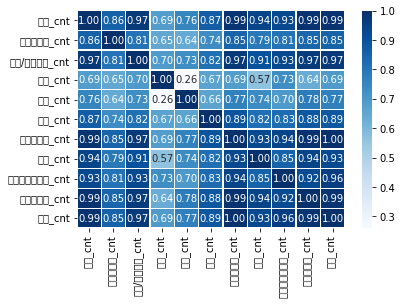

In [391]:
sns.heatmap(data=cardspending.drop(['year', 'month', 'emd_nm'], axis=1).corr(), cmap="Blues", annot=True, fmt='.2f', linewidths=.5)

In [392]:
cardspending['그외_cnt'] = cardspending['간식_cnt']+cardspending['농축수산물_cnt']+cardspending['마트/슈퍼마켓_cnt']
+cardspending['식품_cnt']+cardspending['아시아음식_cnt']+cardspending['양식_cnt']+cardspending['주점및주류판매_cnt']
+cardspending['패스트푸드_cnt']+cardspending['한식_cnt']

0        24075
1        14187
2        18749
3       152365
4        24794
         ...  
1843     13854
1844     10119
1845     29938
1846     58461
1847      7463
Length: 1848, dtype: int64

In [393]:
cardspending = cardspending.loc[:,['year','month', 'emd_nm', '배달_cnt', '부페_cnt', '그외_cnt']]

In [394]:
cardspending

,year,month,emd_nm,배달_cnt,부페_cnt,그외_cnt
0,2018,1,건입동,585,55,23786
1,2018,1,구좌읍,200,20,14992
2,2018,1,남원읍,265,15,18612
3,2018,1,노형동,4330,215,190437
4,2018,1,대륜동,490,25,33201
...,...,...,...,...,...,...
1843,2021,6,표선면,2818,5,15216
1844,2021,6,한경면,1085,5,11435
1845,2021,6,한림읍,7299,20,27460
1846,2021,6,화북동,20370,55,67157


c:\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48176 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45804 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54168 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44536 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50808 missing from current font.
  font.set_text(s, 0.0,

<AxesSubplot:>

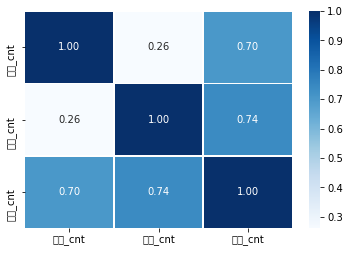

In [395]:
sns.heatmap(data=cardspending.drop(['year', 'month', 'emd_nm'], axis=1).corr(), cmap="Blues", annot=True, fmt='.2f', linewidths=.5)

<AxesSubplot:ylabel='Frequency'>

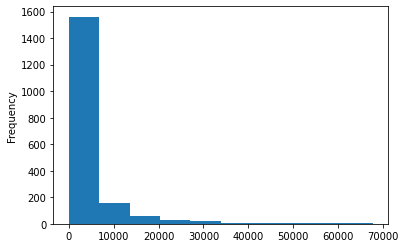

In [396]:
cardspending['배달_cnt'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

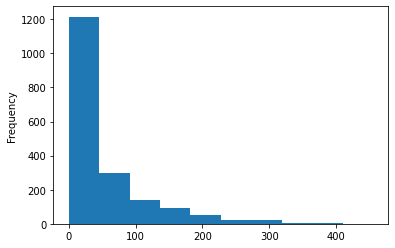

In [397]:
cardspending['부페_cnt'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

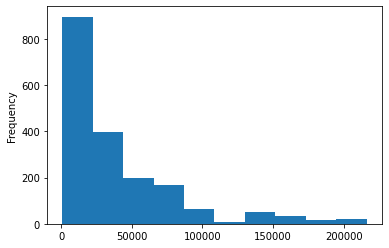

In [398]:
cardspending['그외_cnt'].plot.hist()

In [399]:
cardspending['배달_cnt'] = scaler.fit_transform(cardspending[['배달_cnt']])
cardspending['부페_cnt'] = scaler.fit_transform(cardspending[['부페_cnt']])
cardspending['그외_cnt'] = scaler.fit_transform(cardspending[['그외_cnt']])

In [400]:
cardspending

,year,month,emd_nm,배달_cnt,부페_cnt,그외_cnt
0,2018,1,건입동,-0.431620,0.072577,-0.354659
1,2018,1,구좌읍,-0.480276,-0.465019,-0.563703
2,2018,1,남원읍,-0.472061,-0.541819,-0.477651
3,2018,1,노형동,0.041673,2.530162,3.606832
4,2018,1,대륜동,-0.443626,-0.388220,-0.130853
...,...,...,...,...,...,...
1843,2021,6,표선면,-0.149413,-0.695418,-0.558378
1844,2021,6,한경면,-0.368430,-0.695418,-0.648257
1845,2021,6,한림읍,0.416896,-0.465019,-0.267324
1846,2021,6,화북동,2.068810,0.072577,0.676321


In [401]:
foodwaste

,year,month,emd_nm,em_g
0,2018,1,건입동,0.062786
1,2018,1,남원읍,-0.014238
2,2018,1,노형동,1.921404
3,2018,1,대륜동,0.308802
4,2018,1,대정읍,-0.106610
...,...,...,...,...
1661,2021,6,표선면,-0.048008
1662,2021,6,한경면,-0.489732
1663,2021,6,한림읍,0.691381
1664,2021,6,화북동,0.999399


In [402]:
residentpop_merge = foodwaste.merge(residentpop, left_on=['year', 'month', 'emd_nm'], right_on=['year', 'month', 'emd_nm'])

In [403]:
residentpop_merge

,year,month,emd_nm,em_g,resid_reg_pop,foreign_pop
0,2018,1,건입동,0.062786,-0.108019,-0.310915
1,2018,1,남원읍,-0.014238,0.628948,0.657805
2,2018,1,노형동,1.921404,1.761997,1.545376
3,2018,1,대륜동,0.308802,0.243184,-0.547610
4,2018,1,대정읍,-0.106610,0.737347,1.501671
...,...,...,...,...,...,...
1629,2021,6,표선면,-0.048008,0.146889,0.054121
1630,2021,6,한경면,-0.489732,-0.182776,0.062671
1631,2021,6,한림읍,0.691381,0.745013,2.223614
1632,2021,6,화북동,0.999399,0.893929,0.042602


<AxesSubplot:>

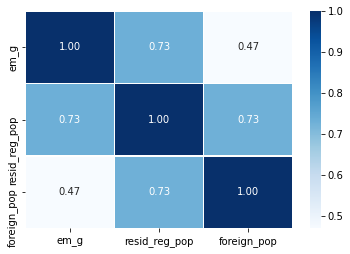

In [421]:
sns.heatmap(data=residentpop_merge.drop(['year', 'month', 'emd_nm'], axis=1).corr(), cmap="Blues", annot=True, fmt='.2f', linewidths=.5)

In [404]:
residentpop_x = residentpop_merge.loc[:,['resid_reg_pop', 'foreign_pop']]
residentpop_y = residentpop_merge.loc[:,['em_g']]

In [405]:
residentpop_x = sm.add_constant(residentpop_x)

In [406]:
model1 = sm.OLS(residentpop_y, residentpop_x)

In [407]:
result1 = model1.fit()

In [408]:
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   em_g   R-squared:                       0.545
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                     975.7
Date:                Wed, 25 Aug 2021   Prob (F-statistic):          2.08e-279
Time:                        18:32:17   Log-Likelihood:                -1538.1
No. Observations:                1634   AIC:                             3082.
Df Residuals:                    1631   BIC:                             3098.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0091      0.015     -0.587      0.557      -0.039       0.021
resid_reg_pop     0.8182      0.024     34.043      0.000       0.771       0.865
foreign_pop      -0.1339      0.024     -5.630      0.000      -0.181      -0.087
==============================================================================
Omnibus:                      782.831   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4982.924
Skew:                          -2.175   Prob(JB):                         0.00
Kurtosis:                      10.366   Cond. No.                         2.55
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [409]:
cardspending_merge = foodwaste.merge(cardspending, left_on=['year', 'month', 'emd_nm'], right_on=['year', 'month', 'emd_nm'])

In [410]:
cardspending_merge

,year,month,emd_nm,em_g,배달_cnt,부페_cnt,그외_cnt
0,2018,1,건입동,0.062786,-0.431620,0.072577,-0.354659
1,2018,1,남원읍,-0.014238,-0.472061,-0.541819,-0.477651
2,2018,1,노형동,1.921404,0.041673,2.530162,3.606832
3,2018,1,대륜동,0.308802,-0.443626,-0.388220,-0.130853
4,2018,1,대정읍,-0.106610,-0.445269,-0.234621,0.047454
...,...,...,...,...,...,...,...
1661,2021,6,표선면,-0.048008,-0.149413,-0.695418,-0.558378
1662,2021,6,한경면,-0.489732,-0.368430,-0.695418,-0.648257
1663,2021,6,한림읍,0.691381,0.416896,-0.465019,-0.267324
1664,2021,6,화북동,0.999399,2.068810,0.072577,0.676321


c:\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48176 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45804 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54168 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44536 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50808 missing from current font.
  font.set_text(s, 0.0,

<AxesSubplot:>

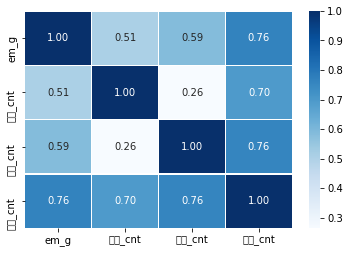

In [422]:
sns.heatmap(data=cardspending_merge.drop(['year', 'month', 'emd_nm'], axis=1).corr(), cmap="Blues", annot=True, fmt='.2f', linewidths=.5)

In [411]:
cardspending_x = cardspending_merge.drop(['year', 'month','emd_nm', 'em_g'], axis=1)
cardspending_y = cardspending_merge.loc[:,['em_g']]

In [412]:
cardspending_x = sm.add_constant(cardspending_x)

In [413]:
model2 = sm.OLS(cardspending_y, cardspending_x)

In [414]:
result2 = model2.fit()

In [415]:
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   em_g   R-squared:                       0.585
Model:                            OLS   Adj. R-squared:                  0.584
Method:                 Least Squares   F-statistic:                     781.6
Date:                Wed, 25 Aug 2021   Prob (F-statistic):          6.39e-317
Time:                        18:32:47   Log-Likelihood:                -1630.9
No. Observations:                1666   AIC:                             3270.
Df Residuals:                    1662   BIC:                             3291.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0530      0.016     -3.341      0.001      -0.084      -0.022
배달_cnt        -0.0514      0.026     -1.994      0.046      -0.102      -0.001
부페_cnt        -0.0185      0.030     -0.627      0.530      -0.076       0.039
그외_cnt         0.7962      0.039     20.477      0.000       0.720       0.872
==============================================================================
Omnibus:                      819.131   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5587.413
Skew:                          -2.219   Prob(JB):                         0.00
Kurtosis:                      10.798   Cond. No.                         4.89
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [416]:
cardspending_x = cardspending_merge.drop(['year', 'month','emd_nm', 'em_g', '부페_cnt'], axis=1)
cardspending_y = cardspending_merge.loc[:,['em_g']]

In [417]:
cardspending_x = sm.add_constant(cardspending_x)

In [418]:
model3 = sm.OLS(cardspending_y, cardspending_x)

In [419]:
result3 = model3.fit()

In [420]:
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   em_g   R-squared:                       0.585
Model:                            OLS   Adj. R-squared:                  0.585
Method:                 Least Squares   F-statistic:                     1173.
Date:                Wed, 25 Aug 2021   Prob (F-statistic):          2.01e-318
Time:                        18:37:31   Log-Likelihood:                -1631.1
No. Observations:                1666   AIC:                             3268.
Df Residuals:                    1663   BIC:                             3284.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0524      0.016     -3.310      0.001      -0.083      -0.021
배달_cnt        -0.0422      0.021     -1.993      0.046      -0.084      -0.001
그외_cnt         0.7759      0.021     36.092      0.000       0.734       0.818
==============================================================================
Omnibus:                      819.565   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5595.032
Skew:                          -2.220   Prob(JB):                         0.00
Kurtosis:                      10.803   Cond. No.                         2.38
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""